# Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

Start by loading some libraries

In [1]:
# get some libraries imported and ready to use
library(ggplot2)
# library(easyGgplot2) # this would have been nice to better arrange the plots.
# library(gridExtra) # this would have been nice to better arrange the plots.
library(dplyr)
# library(magrittr)
# library(stringr)

# unit testing
# library(testit)

# Date/Time formatting
library(lubridate)
library(tidyverse)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


Load the datasets from CSV

In [2]:
ch_orig = read.csv('chicago.csv')
ny_orig = read.csv('new_york_city.csv')
wa_orig = read.csv('washington.csv')

Verify that they have loaded

In [3]:
head(ch_orig, n = 2)
tail(ch_orig, n = 2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8629,777620,2017-05-10 08:53:03,2017-05-10 08:54:32,89,Western Ave & Leland Ave,Western Ave & Leland Ave,Subscriber,Male,1977
8630,1230561,2017-06-11 14:52:13,2017-06-11 15:42:33,3020,Waba,,,,NA


In [4]:
head(ny_orig, n = 2)
tail(ny_orig, n = 2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
54769,6762960,2017-06-30 07:48:34,2017-06-30 08:17:16,1722,Cathedral Pkwy & Broadway,Broadway & W 51 St,Subscriber,Male,1974
54770,6078570,2017-06-18 16:20:21,201,NA,,,,,NA


In [5]:
head(wa_orig, n = 2)
tail(wa_orig, n = 2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89050,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345.911,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer
89051,132,,,NA,,,


It looks like the last row of all three sets is incomplete. I will drop that row. Additionally, the column names are not to my liking. I will remove the '.' or replace them with '_'

In [6]:
# drop the last row from each dataset
ch_orig <- head(ch_orig, - 1)
ny_orig <- head(ny_orig, - 1)
wa_orig <- head(wa_orig, - 1)

In [7]:
# verify that the last row is now a complete row
tail(ch_orig, n = 2)
tail(ny_orig, n = 2)
tail(wa_orig, n = 2)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8628,858496,2017-05-16 17:03:24,2017-05-16 17:31:12,1668,Ashland Ave & Harrison St,Wells St & Concord Ln,Subscriber,Male,1963
8629,777620,2017-05-10 08:53:03,2017-05-10 08:54:32,89,Western Ave & Leland Ave,Western Ave & Leland Ave,Subscriber,Male,1977


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
54768,5679624,2017-06-11 12:52:27,2017-06-11 12:58:35,367,8 Ave & W 33 St,W 45 St & 8 Ave,Subscriber,Male,1954
54769,6762960,2017-06-30 07:48:34,2017-06-30 08:17:16,1722,Cathedral Pkwy & Broadway,Broadway & W 51 St,Subscriber,Male,1974


,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89049,1214907,2017-05-19 09:00:53,2017-05-19 09:07:38,404.152,1st & M St NE,1st & Rhode Island Ave NW,Subscriber
89050,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345.911,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer


In [8]:
# Function to rename columns from Foo.Bar to FooBar
#   parameters:
#       df - the dataframe to work on
#   return: df
#
#
ColumnRename <- function(df) {
    newNames = gsub(".", "_", colnames(df), fixed = TRUE)

    for (n in 1:ncol(df)) {
        colnames(df)[n] = newNames[n]
    }
       
    return (df)
}

In [9]:
# rename the columns to remove the period in them
ch_orig <- ColumnRename(ch_orig)
ny_orig <- ColumnRename(ny_orig)
wa_orig <- ColumnRename(wa_orig)

Verify the renamed columns

In [10]:
colnames(ch_orig)
colnames(ny_orig)
colnames(wa_orig)

[1] "X"             "Start_Time"    "End_Time"      "Trip_Duration"
[5] "Start_Station" "End_Station"   "User_Type"     "Gender"       
[9] "Birth_Year"

[1] "X"             "Start_Time"    "End_Time"      "Trip_Duration"
[5] "Start_Station" "End_Station"   "User_Type"     "Gender"       
[9] "Birth_Year"

[1] "X"             "Start_Time"    "End_Time"      "Trip_Duration"
[5] "Start_Station" "End_Station"   "User_Type"

Take a closer look at the data types for the columns.

In [11]:
glimpse(ch_orig)

Observations: 8,629
Variables: 9
$ X             <int> 1423854, 955915, 9031, 304487, 45207, 1473887, 961916, …
$ Start_Time    <fct> 2017-06-23 15:09:32, 2017-05-25 18:19:03, 2017-01-04 08…
$ End_Time      <fct> 2017-06-23 15:14:53, 2017-05-25 18:45:53, 2017-01-04 08…
$ Trip_Duration <int> 321, 1610, 416, 350, 534, 586, 281, 723, 689, 493, 301,…
$ Start_Station <fct> Wood St & Hubbard St, Theater on the Lake, May St & Tay…
$ End_Station   <fct> Damen Ave & Chicago Ave, Sheffield Ave & Waveland Ave, …
$ User_Type     <fct> Subscriber, Subscriber, Subscriber, Subscriber, Subscri…
$ Gender        <fct> Male, Female, Male, Male, Male, Male, Female, , Male, M…
$ Birth_Year    <dbl> 1992, 1992, 1981, 1986, 1975, 1990, 1983, NA, 1984, 197…


The `Start_Time` and `End_Time` columns are not datetime, and it would be helpful to have those broken out a bit. `Trip_Duration` is in seconds, that would be more convenient if it were in minutes.

In [12]:
# convert start and end times to datetime
ch_orig$Start_Time <- ymd_hms(ch_orig$Start_Time)
ch_orig$End_Time <- ymd_hms(ch_orig$End_Time)
ny_orig$Start_Time <- ymd_hms(ny_orig$Start_Time)
ny_orig$End_Time <- ymd_hms(ny_orig$End_Time)
wa_orig$Start_Time <- ymd_hms(wa_orig$Start_Time)
wa_orig$End_Time <- ymd_hms(wa_orig$End_Time)

In [13]:
# Function to break out the date parts from the Start_Time timestamp
# and add a Trip_Duration_Minutes column with value calculated from Trip_Duration
#   parameters:
#       df - the dataframe to work on
#   return: df
#
BreakOutDateParts <- function(df) {
    df$Month <- format(as.Date(df$Start_Time), "%B")
    df$Month_Number <- as.integer(format(as.Date(df$Start_Time), "%m"))
    df$Day <- as.integer(format(as.Date(df$Start_Time), "%d"))
    df$Day_of_Week <- format(as.Date(df$Start_Time), "%A")
    df$Day_of_Week_Number <- as.integer(format(as.Date(df$Start_Time), "%w"))
    df$Year <- as.integer(format(as.Date(df$Start_Time), "%Y"))
    df$Hour <- as.integer(format(as.POSIXct(df$Start_Time), format = "%H"))
    df$Trip_Duration_Minutes <- as.integer(round(df$Trip_Duration / 60, digits = 0))
    
    return (df)
}

In [14]:
# break out the date parts for each city dataframe
ch_orig <- BreakOutDateParts(ch_orig)
ny_orig <- BreakOutDateParts(ny_orig)
wa_orig <- BreakOutDateParts(wa_orig)

In [15]:
is.null(ch_orig)
is.null(ny_orig)
is.null(wa_orig)

[1] FALSE

[1] FALSE

[1] FALSE

Washington does not contain `Gender` and `Birth_Year`. I will drop those columns from Chicago and New York. This will make it easier to combine all three cities into a master dataset.

In [16]:
# the ch and ny dfs need Gender and Birth_Year removed
# before I can combine into an All Cities dataframe
# copy the original dataframes before dropping columns
ch_full <- ch_orig
ny_full <- ny_orig

# drop the unwanted columns
ch_orig <- subset(ch_orig, select = -c(Gender, Birth_Year))
ny_orig <- subset(ny_orig, select = -c(Gender, Birth_Year))

In [17]:
#create a combined dataset
ac_orig = rbind(ch_orig, ny_orig, wa_orig)

In [18]:
table(ch_orig$Month_Number)
table(ch_orig$Trip_Duration_Minutes)
print("Chicago Trip Durations")
table(ny_orig$Trip_Duration_Minutes)
print("New York Trip Durations")
table(wa_orig$Trip_Duration_Minutes)
print("Washington Trip Durations")


   1    2    3    4    5    6 
 650  930  803 1526 1905 2815 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  31  160  348  527  518  537  528  537  447  416  395  382  338  304  270  252 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 232  220  217  184  170  161  162  147  131  109   86   76   64   55   44   43 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  39   33   22   20   15   12   14   14   10   15    8   12   16   12   13   14 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  16    6    4    9    8    6    7    6   12    4    6    5    6    8    2    6 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
  11    3    2    2    2    4    6    4    2    5    6    3    4    4    1    2 
  81   82   83   84   85   86   87   88   89   91   92   96   97   98   99  100 
   1    2    2    2    4    2    2    1    2    1    2    2    3    2    2    1 
 101  102  103  104  105  1

[1] "Chicago Trip Durations"



    1     2     3     4     5     6     7     8     9    10    11    12    13 
  237  1278  2500  3403  3770  4068  3631  3545  3019  2903  2482  2240  1918 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 1792  1507  1421  1333  1192  1086  1060   899   861   776   787   650   668 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
  560   531   507   431   348   321   264   248   242   215   193   185   160 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
  154   126   122    82    92    49    56    44    49    33    38    31    23 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   28    24    22    11    18    18    18    15    14    11    19    14    10 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
   10    12     6     7     5    11    11     6     9     2     6     5     2 
   79    80    81    82    83    84    85    86    

[1] "New York Trip Durations"



    1     2     3     4     5     6     7     8     9    10    11    12    13 
  232  1573  3234  4717  5205  5464  5164  4984  4636  4292  3957  3490  3267 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 3095  2705  2587  2338  2041  1916  1802  1671  1507  1473  1351  1148  1108 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
  998   944   806   624   548   435   382   357   303   274   290   259   231 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
  228   200   212   178   172   160   162   147   147   176   146   162   138 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
  141   137   103   105   116   128   102    95   104   103   103    80    90 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
   77    78    74    80    71    64    75    60    54    64    62    58    56 
   79    80    81    82    83    84    85    86    

[1] "Washington Trip Durations"


In [19]:
# Function to create a plot of trip durations
# and add a Trip_Duration_Minutes column with value calculated from Trip_Duration
#   parameters:
#       df - the dataframe to work on
#       title - title for the plot
#       xlab - label for the x axis
#       ylab - label for the y axis
#   return: plot
#
PlotTripDurations <- function(df, title, xlab, ylab) {
    hp<-ggplot(df, aes(x=Trip_Duration_Minutes)) + 
        geom_histogram(color = "black", fill = "black", binwidth = 5) +
        labs(title = title, x = xlab, y = ylab)

    return (hp)
}

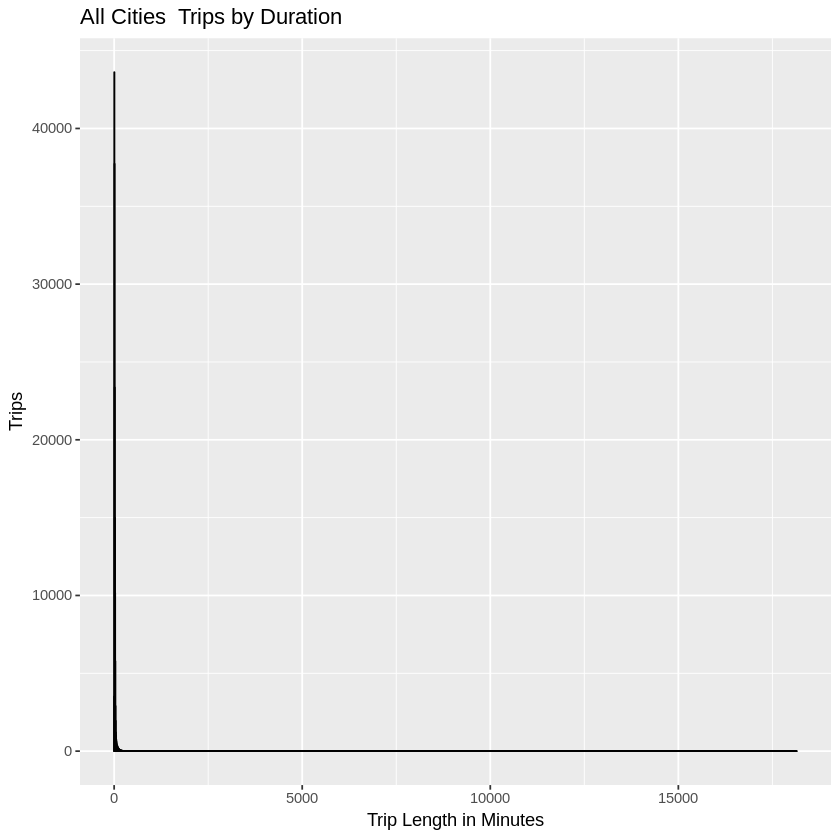

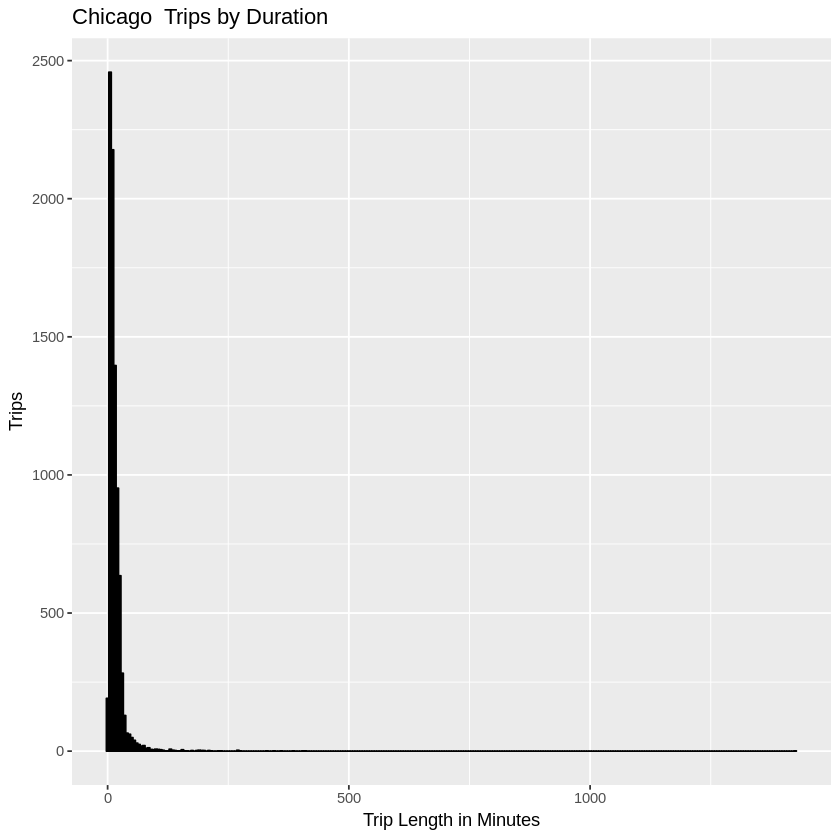

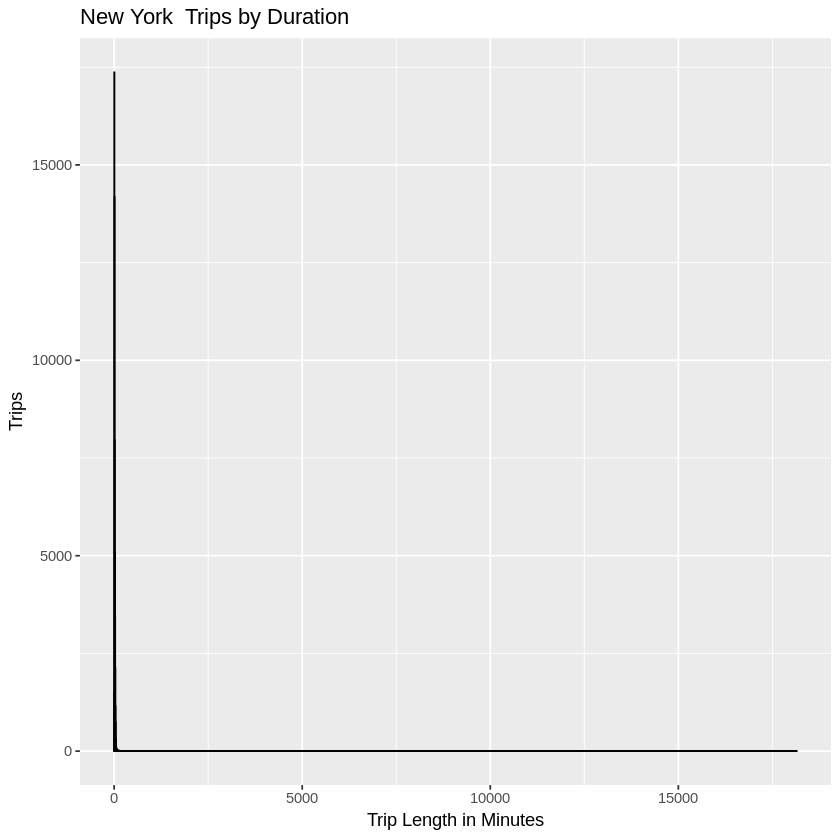

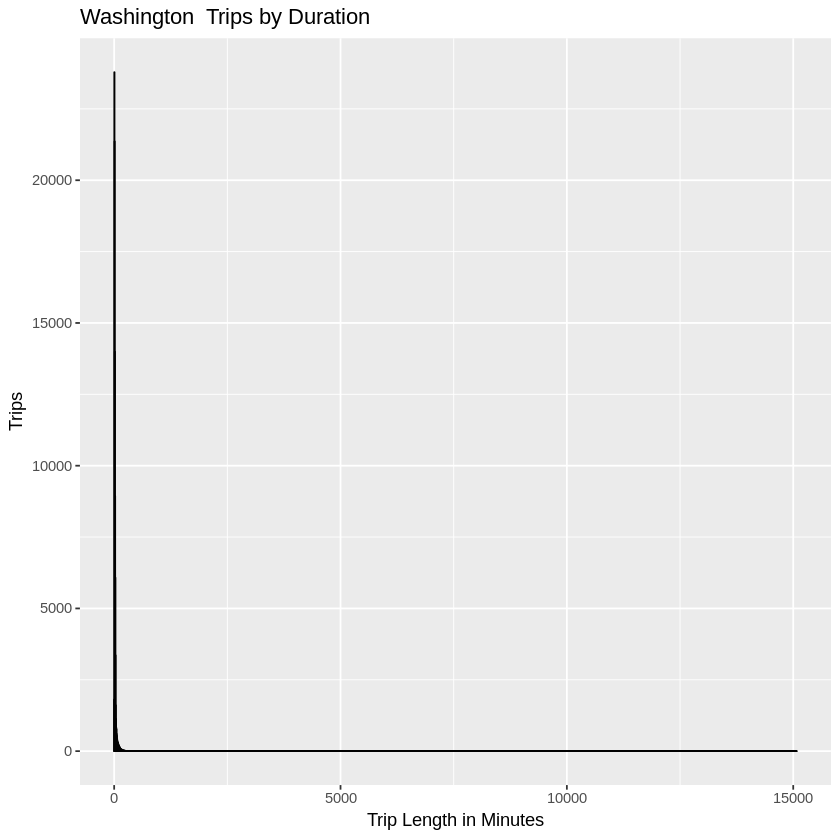

In [20]:
# Histograms of use by Month
# xaxis = "Month_Number"
baseTitle = " Trips by Duration"
xlab = "Trip Length in Minutes"
ylab = "Trips"

# All Cities
city = "All Cities"
title = paste(city, baseTitle)
#acm<-PlotHistogram(ch, xaxis, acGreen, title, xlab, ylab)
actd<-PlotTripDurations(ac_orig, title, xlab, ylab)

# Chicago
city = "Chicago"
title = paste(city, baseTitle)
chtd<-PlotTripDurations(ch_orig, title, xlab, ylab)

# New York
city = "New York"
title = paste(city, baseTitle)
nytd<-PlotTripDurations(ny_orig, title, xlab, ylab)

# Washington
city = "Washington"
title = paste(city, baseTitle)
watd<-PlotTripDurations(wa_orig, title, xlab, ylab)

actd
chtd
nytd
watd

In [21]:
summary(ch_orig$Trip_Duration_Minutes)
summary(ny_orig$Trip_Duration_Minutes)
summary(wa_orig$Trip_Duration_Minutes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   11.00   15.61   19.00 1423.00 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     6.00    10.00    15.06    18.00 18144.00 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     7.00    12.00    20.57    21.00 15077.00 

There are a lot of longer trips durations with low trip counts which can be seen skewing the data in the above charts. I'll create new dataframes with most of the longer trips excluded.

In [22]:
ac <- ac_orig[which(ac_orig$Trip_Duration_Minutes <= 25),]
ch <- ch_orig[which(ch_orig$Trip_Duration_Minutes <= 25),]
ny <- ny_orig[which(ny_orig$Trip_Duration_Minutes <= 25),]
wa <- wa_orig[which(wa_orig$Trip_Duration_Minutes <= 25),]

Verify those changes

In [23]:
table(ch$Trip_Duration_Minutes)
print("Chicago Trip Durations")
table(ny$Trip_Duration_Minutes)
print("New York Trip Durations")
table(wa$Trip_Duration_Minutes)
print("Washington Trip Durations")


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 31 160 348 527 518 537 528 537 447 416 395 382 338 304 270 252 232 220 217 184 
 21  22  23  24  25 
170 161 162 147 131 

[1] "Chicago Trip Durations"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 237 1278 2500 3403 3770 4068 3631 3545 3019 2903 2482 2240 1918 1792 1507 1421 
  17   18   19   20   21   22   23   24   25 
1333 1192 1086 1060  899  861  776  787  650 

[1] "New York Trip Durations"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 232 1573 3234 4717 5205 5464 5164 4984 4636 4292 3957 3490 3267 3095 2705 2587 
  17   18   19   20   21   22   23   24   25 
2338 2041 1916 1802 1671 1507 1473 1351 1148 

[1] "Washington Trip Durations"


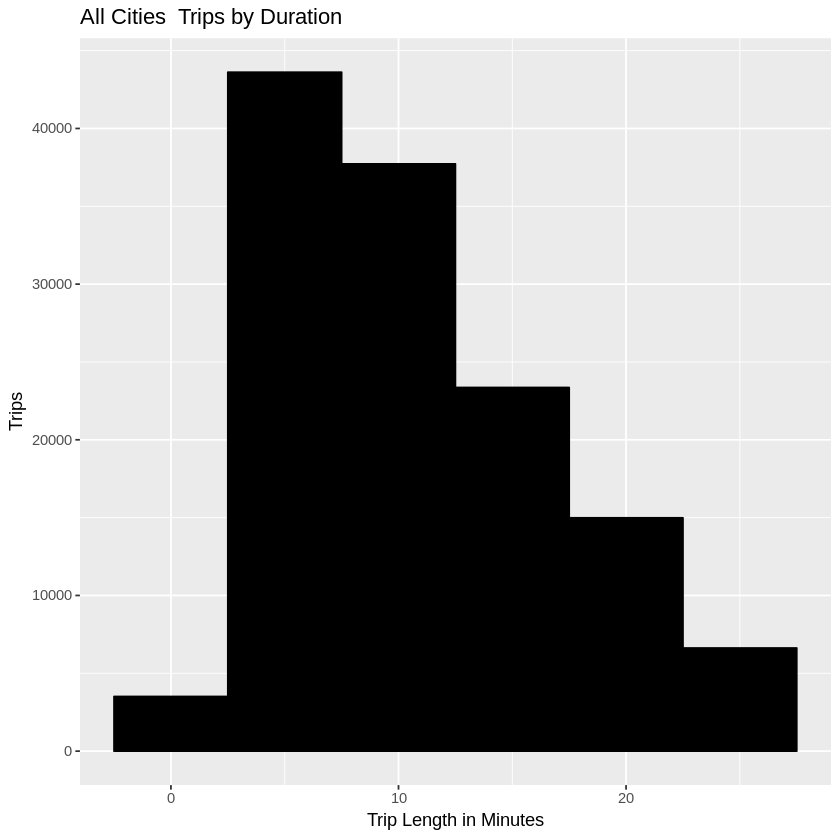

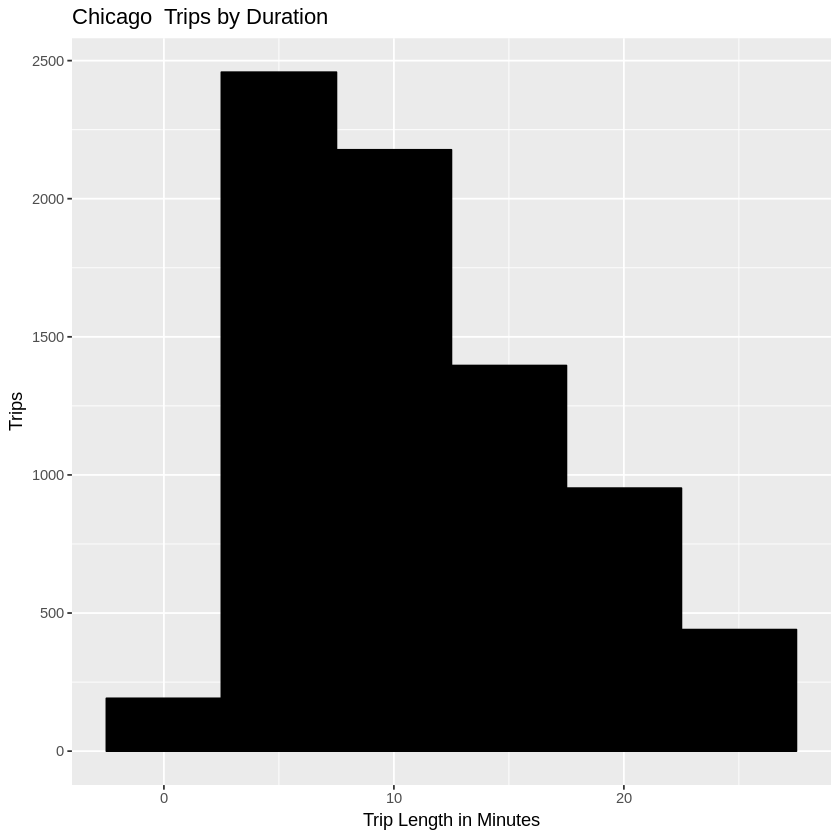

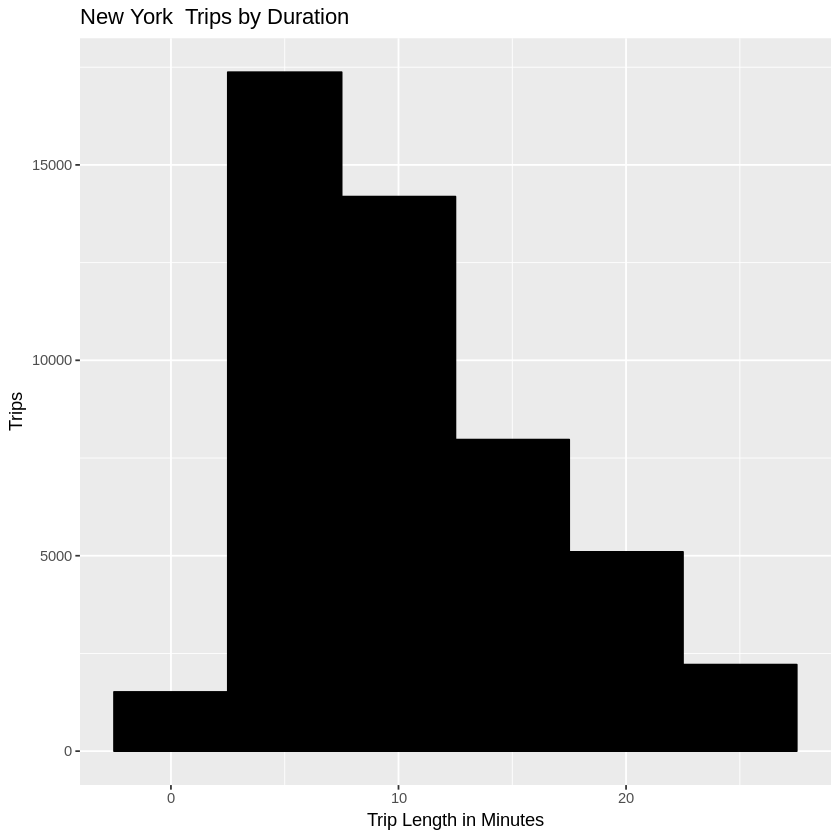

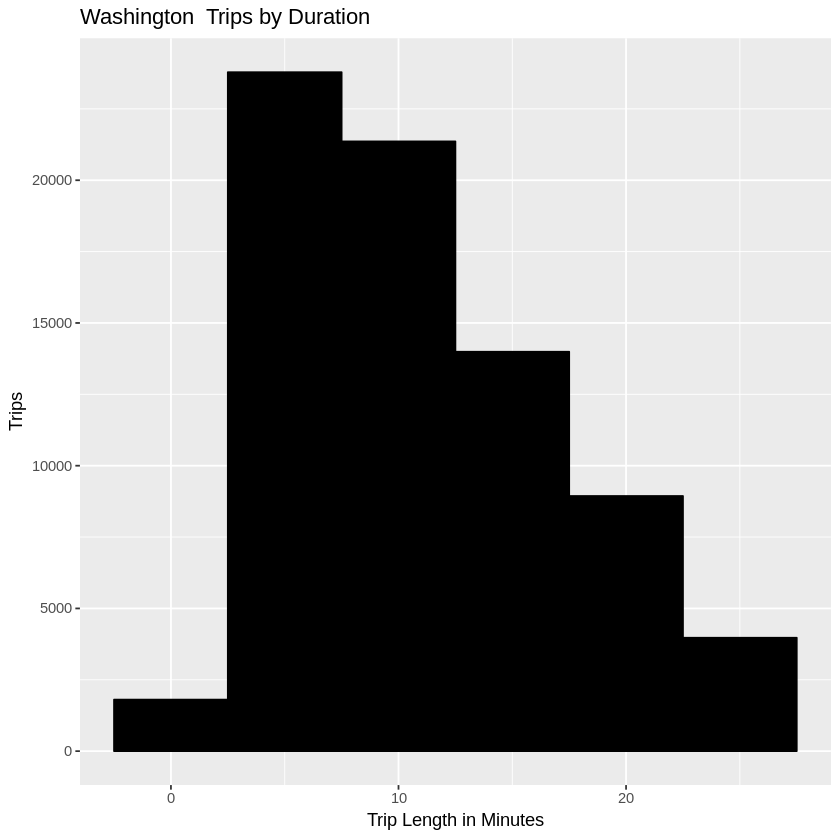

In [24]:
# Histograms of use by Month
# xaxis = "Month_Number"
baseTitle = " Trips by Duration"
xlab = "Trip Length in Minutes"
ylab = "Trips"

# All Cities
city = "All Cities"
title = paste(city, baseTitle)
#acm<-PlotHistogram(ch, xaxis, acGreen, title, xlab, ylab)
actd<-PlotTripDurations(ac, title, xlab, ylab)

# Chicago
city = "Chicago"
title = paste(city, baseTitle)
chtd<-PlotTripDurations(ch, title, xlab, ylab)

# New York
city = "New York"
title = paste(city, baseTitle)
nytd<-PlotTripDurations(ny, title, xlab, ylab)

# Washington
city = "Washington"
title = paste(city, baseTitle)
watd<-PlotTripDurations(wa, title, xlab, ylab)

actd
chtd
nytd
watd

In [25]:
summary(ch$Trip_Duration_Minutes)
summary(ny$Trip_Duration_Minutes)
summary(wa$Trip_Duration_Minutes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.0    10.0    11.1    15.0    25.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00    9.00   10.41   14.00   25.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00   10.00   11.06   15.00   25.00 

Those are ugly histograms, color and `binsize` or `bins` would help a lot; but they don't show the LOOOOONG tail that the first set showed, so I have done what I intended to do.

In [26]:
glimpse(ch)
glimpse(ny)
glimpse(wa)

Observations: 7,614
Variables: 15
$ X                     <int> 1423854, 9031, 304487, 45207, 1473887, 961916, …
$ Start_Time            <dttm> 2017-06-23 15:09:32, 2017-01-04 08:27:49, 2017…
$ End_Time              <dttm> 2017-06-23 15:14:53, 2017-01-04 08:34:45, 2017…
$ Trip_Duration         <int> 321, 416, 350, 534, 586, 281, 723, 689, 493, 30…
$ Start_Station         <fct> Wood St & Hubbard St, May St & Taylor St, Chris…
$ End_Station           <fct> Damen Ave & Chicago Ave, Wood St & Taylor St, S…
$ User_Type             <fct> Subscriber, Subscriber, Subscriber, Subscriber,…
$ Month                 <chr> "June", "January", "March", "January", "June", …
$ Month_Number          <int> 6, 1, 3, 1, 6, 5, 1, 4, 2, 2, 1, 1, 5, 4, 5, 5,…
$ Day                   <int> 23, 4, 6, 17, 26, 26, 21, 20, 6, 15, 22, 8, 30,…
$ Day_of_Week           <chr> "Friday", "Wednesday", "Monday", "Tuesday", "Mo…
$ Day_of_Week_Number    <int> 5, 3, 1, 2, 1, 5, 6, 4, 1, 3, 0, 0, 2, 4, 4, 3,…
$ Year            

In [27]:
print("Chicago")
summary(is.na(ch))
print("New York")
summary(is.na(ny))
print("Washington")
summary(is.na(wa))

[1] "Chicago"


     X           Start_Time       End_Time       Trip_Duration  
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:7614      FALSE:7614      FALSE:7614      FALSE:7614     
 Start_Station   End_Station     User_Type         Month        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:7614      FALSE:7614      FALSE:7614      FALSE:7614     
 Month_Number       Day          Day_of_Week     Day_of_Week_Number
 Mode :logical   Mode :logical   Mode :logical   Mode :logical     
 FALSE:7614      FALSE:7614      FALSE:7614      FALSE:7614        
    Year            Hour         Trip_Duration_Minutes
 Mode :logical   Mode :logical   Mode :logical        
 FALSE:7614      FALSE:7614      FALSE:7614           

[1] "New York"


     X           Start_Time       End_Time       Trip_Duration  
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:48358     FALSE:48358     FALSE:48358     FALSE:48358    
 Start_Station   End_Station     User_Type         Month        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:48358     FALSE:48358     FALSE:48358     FALSE:48358    
 Month_Number       Day          Day_of_Week     Day_of_Week_Number
 Mode :logical   Mode :logical   Mode :logical   Mode :logical     
 FALSE:48358     FALSE:48358     FALSE:48358     FALSE:48358       
    Year            Hour         Trip_Duration_Minutes
 Mode :logical   Mode :logical   Mode :logical        
 FALSE:48358     FALSE:48358     FALSE:48358          

[1] "Washington"


     X           Start_Time       End_Time       Trip_Duration  
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:73849     FALSE:73849     FALSE:73849     FALSE:73849    
 Start_Station   End_Station     User_Type         Month        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:73849     FALSE:73849     FALSE:73849     FALSE:73849    
 Month_Number       Day          Day_of_Week     Day_of_Week_Number
 Mode :logical   Mode :logical   Mode :logical   Mode :logical     
 FALSE:73849     FALSE:73849     FALSE:73849     FALSE:73849       
    Year            Hour         Trip_Duration_Minutes
 Mode :logical   Mode :logical   Mode :logical        
 FALSE:73849     FALSE:73849     FALSE:73849          

In [28]:
summary(ch)
summary(ny)
summary(wa)

       X             Start_Time                     End_Time                  
 Min.   :     36   Min.   :2017-01-01 00:40:14   Min.   :2017-01-01 00:46:32  
 1st Qu.: 358997   1st Qu.:2017-03-18 16:08:13   1st Qu.:2017-03-18 16:15:18  
 Median : 751680   Median :2017-05-07 12:18:45   Median :2017-05-07 12:24:10  
 Mean   : 761533   Mean   :2017-04-25 14:53:21   Mean   :2017-04-25 15:04:27  
 3rd Qu.:1156064   3rd Qu.:2017-06-07 13:38:01   3rd Qu.:2017-06-07 13:42:42  
 Max.   :1551248   Max.   :2017-06-30 23:10:48   Max.   :2017-06-30 23:13:41  
                                                                              
 Trip_Duration                         Start_Station 
 Min.   :  60.0   Streeter Dr & Grand Ave     : 137  
 1st Qu.: 365.2   Clinton St & Washington Blvd: 118  
 Median : 595.0   Canal St & Adams St         :  98  
 Mean   : 666.1   Clinton St & Madison St     :  96  
 3rd Qu.: 924.0   Canal St & Madison St       :  84  
 Max.   :1529.0   Lake Shore Dr & Monroe St 

       X             Start_Time                     End_Time                  
 Min.   :     47   Min.   :2017-01-01 00:17:01   Min.   :2017-01-01 00:30:56  
 1st Qu.:1641892   1st Qu.:2017-03-05 06:27:37   1st Qu.:2017-03-05 06:31:04  
 Median :3342638   Median :2017-04-26 20:43:31   Median :2017-04-26 20:51:27  
 Mean   :3364153   Mean   :2017-04-17 19:35:35   Mean   :2017-04-17 19:46:01  
 3rd Qu.:5083629   3rd Qu.:2017-05-31 22:52:56   3rd Qu.:2017-05-31 22:59:20  
 Max.   :6816152   Max.   :2017-06-30 23:52:44   Max.   :2017-06-30 23:59:36  
                                                                              
 Trip_Duration                  Start_Station                  End_Station   
 Min.   :  61.0   Pershing Square North:  546   Pershing Square North:  522  
 1st Qu.: 343.0   W 21 St & 6 Ave      :  367   E 17 St & Broadway   :  412  
 Median : 544.0   E 17 St & Broadway   :  360   Broadway & E 22 St   :  403  
 Mean   : 624.7   Broadway & E 22 St   :  348   W 21 St 

       X             Start_Time                     End_Time                  
 Min.   :      7   Min.   :2017-01-01 00:11:00   Min.   :2017-01-01 00:14:00  
 1st Qu.: 409825   1st Qu.:2017-03-01 22:03:00   1st Qu.:2017-03-01 22:12:00  
 Median : 859392   Median :2017-04-17 06:58:27   Median :2017-04-17 07:09:04  
 Mean   : 857595   Mean   :2017-04-13 06:57:12   Mean   :2017-04-13 07:05:31  
 3rd Qu.:1299354   3rd Qu.:2017-05-27 04:54:51   3rd Qu.:2017-05-27 05:03:07  
 Max.   :1751391   Max.   :2017-06-30 12:55:10   Max.   :2017-07-01 12:00:37  
                                                                              
 Trip_Duration                                                 Start_Station  
 Min.   :  60.27   Columbus Circle / Union Station                    : 1575  
 1st Qu.: 368.28   Massachusetts Ave & Dupont Circle NW               : 1072  
 Median : 593.48   15th & P St NW                                     :  981  
 Mean   : 663.67   14th & V St NW                   

In [29]:
head(ch, n = 1)
head(ny, n = 1)
head(wa, n = 1)

X,Start_Time,End_Time,Trip_Duration,Start_Station,End_Station,User_Type,Month,Month_Number,Day,Day_of_Week,Day_of_Week_Number,Year,Hour,Trip_Duration_Minutes
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,June,6,23,Friday,5,2017,15,5


X,Start_Time,End_Time,Trip_Duration,Start_Station,End_Station,User_Type,Month,Month_Number,Day,Day_of_Week,Day_of_Week_Number,Year,Hour,Trip_Duration_Minutes
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,June,6,11,Sunday,0,2017,14,13


X,Start_Time,End_Time,Trip_Duration,Start_Station,End_Station,User_Type,Month,Month_Number,Day,Day_of_Week,Day_of_Week_Number,Year,Hour,Trip_Duration_Minutes
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,June,6,21,Wednesday,3,2017,8,8


## Question 1

### Popular times of travel (i.e., occurs most often in the start time)

* What is the most common month?
* What is the most common day of week?
* What is the most common hour of day?

In [30]:
# set variables for fill color for the three cities and the combined dataset
# All Cities
acPurple = "#800080"
acGreen = "#00ff00"

# Chicago
chBlue = "#b3ddf2"
chRed = '#ff0000'

# New York
nyBlue = "#003884"
nyOrange = '#ff6600'

# Washington
waRed = "#E81B39"

In [31]:
# A Function for creating histograms of use by month
#   parameters:
#       df - the data frame to use for the plot
#       xaxis - the name of the column to use for the x-axis
#       fill - the fill color for the bars, in rgb hex values:
#           eg. #ffffff for white
#       title - a string to use as the title of the plot
#       xlab - the label string for the x-axis
#       ylab - the label string for the y-axis
#   return: plot object
#
#
#PlotByMonth <- function(df, xaxis, fill, title, xlab, ylab) {
PlotByMonth <- function(df, fill, title, xlab, ylab) {
    # print(xaxis)
    #hp<-ggplot(df, aes(x = xaxis)) + 
    hp<-ggplot(df, aes(x = Month_Number)) + 
            #geom_histogram(color = "black", fill = fill, stat="count") +
            geom_histogram(color = "black", fill = fill, bins = 6) +
            labs(title = title, x = xlab, y = ylab) #+
            #scale_x_discrete(labels=c("1" = "January", "2" = "February", "3" = "March",
             #                        "4" = "April", "5" = "May", "6" = "June"))

    return (hp)
}

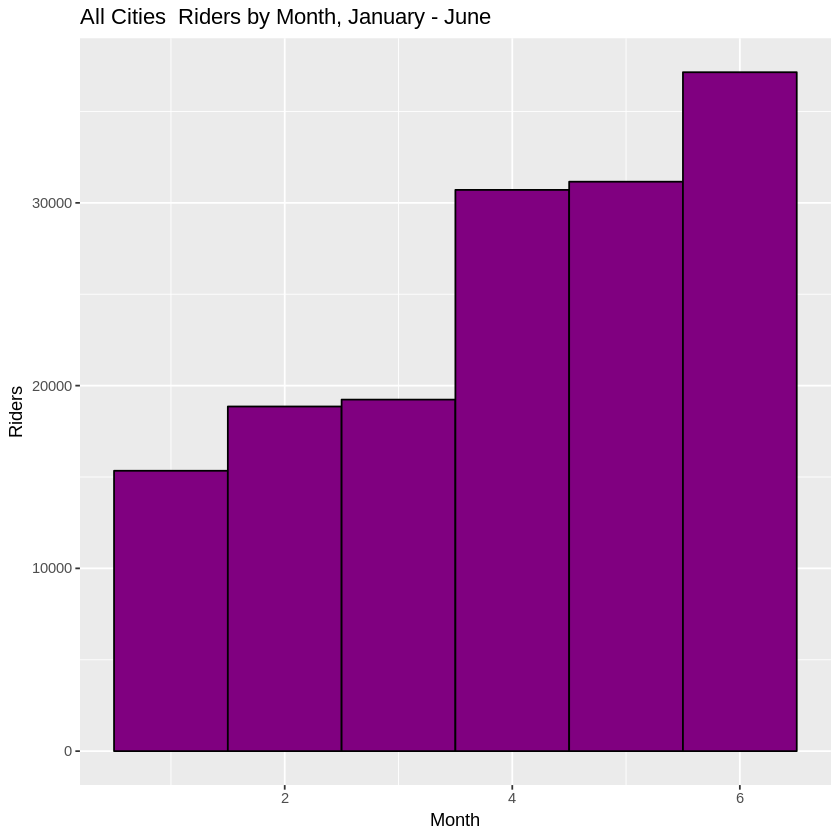

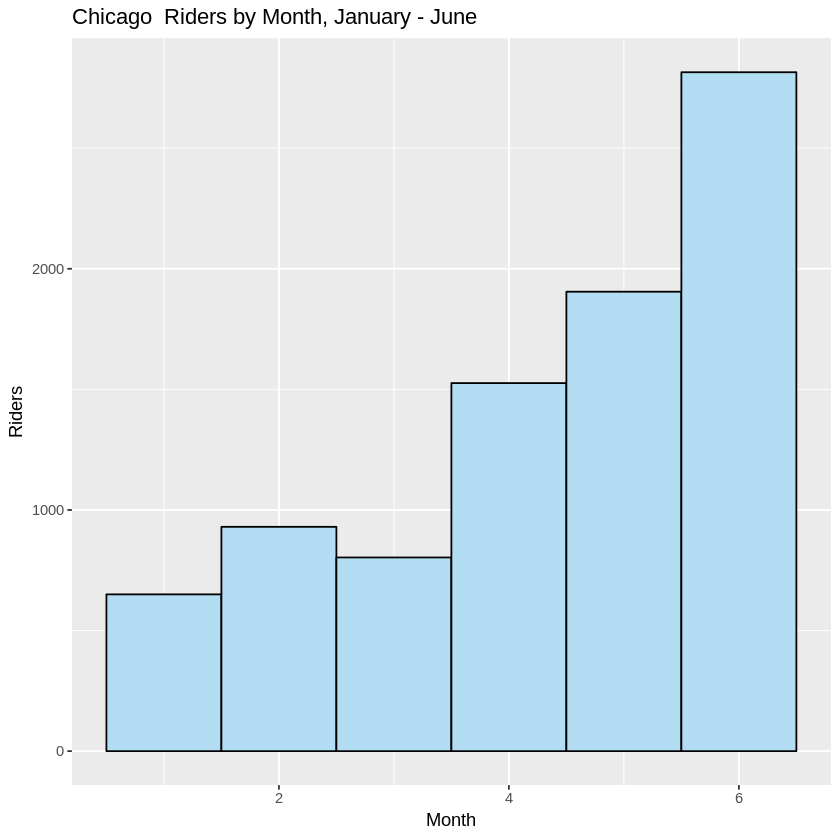

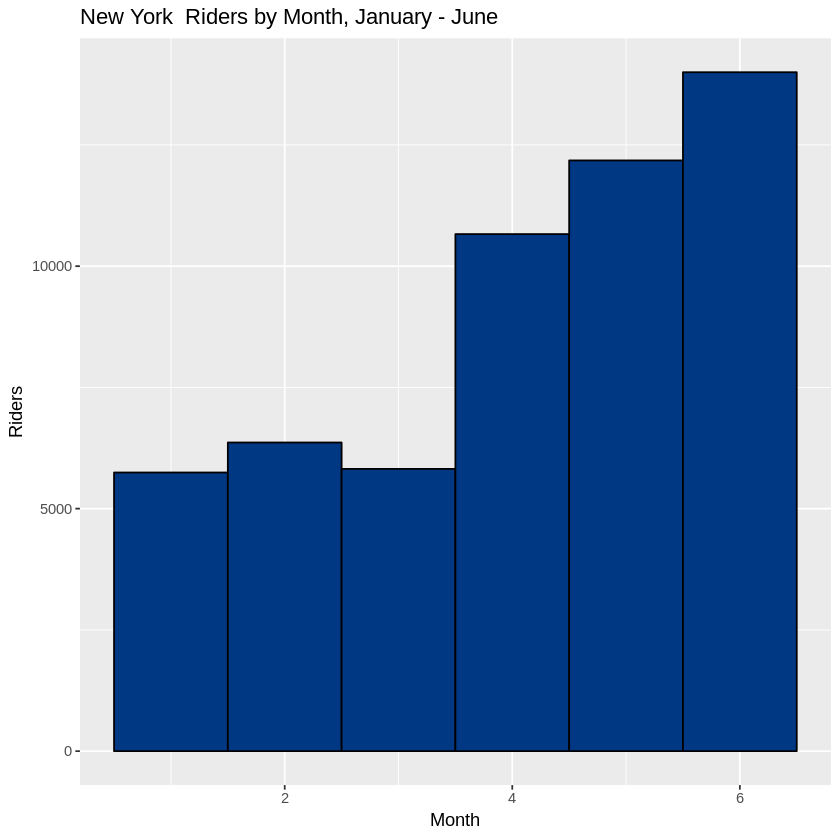

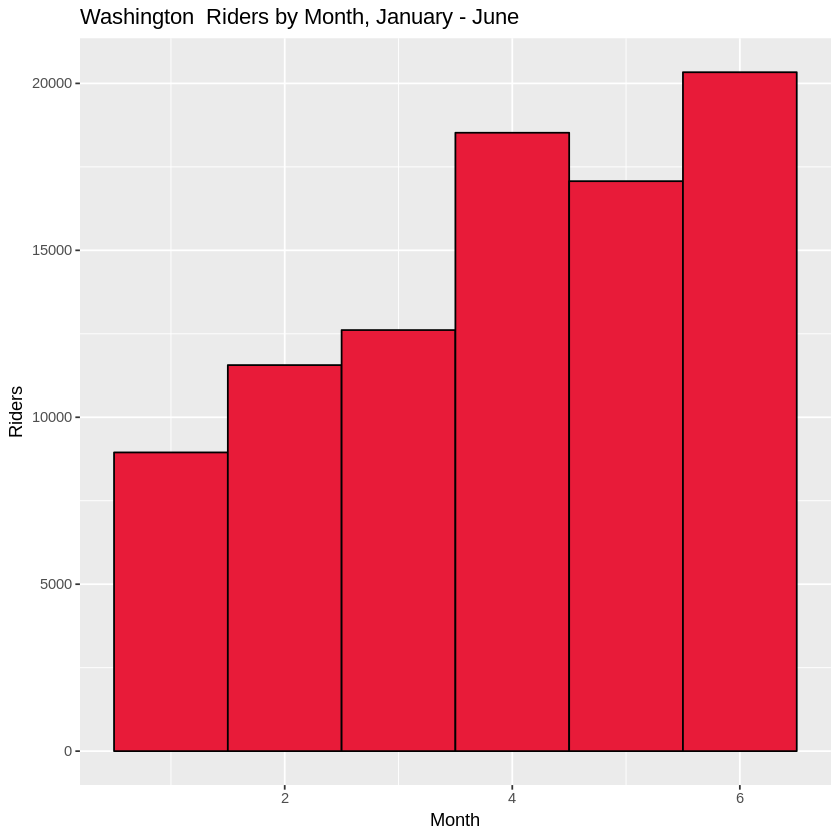

In [32]:
# Histograms of use by Month
# xaxis = "Month_Number"
baseTitle = " Riders by Month, January - June"
xlab = "Month"
ylab = "Riders"

# All Cities
city = "All Cities"
title = paste(city, baseTitle)
#acm<-PlotHistogram(ch, xaxis, acGreen, title, xlab, ylab)
acm<-PlotByMonth(ac_orig, acPurple, title, xlab, ylab)

# Chicago
city = "Chicago"
title = paste(city, baseTitle)
chm<-PlotByMonth(ch_orig, chBlue, title, xlab, ylab)

# New York
city = "New York"
title = paste(city, baseTitle)
nym<-PlotByMonth(ny_orig, nyBlue, title, xlab, ylab)

# Washington
city = "Washington"
title = paste(city, baseTitle)
wam<-PlotByMonth(wa_orig, waRed, title, xlab, ylab)

acm
chm
nym
wam

In [33]:
# what day had the most riders in All Cities?
ac_orig %>% count(Month, sort = TRUE)

Month,n
June,37149
May,31157
April,30709
March,19235
February,18857
January,15341


In [34]:
# what day had the most riders in Chicago?
ch_orig %>% count(Month, sort = TRUE)

Month,n
June,2815
May,1905
April,1526
February,930
March,803
January,650


In [35]:
# what day had the most riders in New York?
ny_orig %>% count(Month, sort = TRUE)

Month,n
June,13999
May,12180
April,10661
February,6364
March,5820
January,5745


In [36]:
# what day had the most riders in Washington?
wa_orig %>% count(Month, sort = TRUE)

Month,n
June,20335
April,18522
May,17072
March,12612
February,11563
January,8946


#### What is the most common month?

From the above histograms and count tables it is clear that bikes are use the least in the winter and progressively more as the weather warms. This holds true for each city individually as well all all the cities as a whole (we don't have a simpson's paradox.)

In [37]:
# A Function for creating rides by day of week histograms
#   parameters:
#       df - the data frame to use for the plot
#       xaxis - the name of the column to use for the x-axis
#       fill - the fill color for the bars, in rgb hex values:
#           eg. #ffffff for white
#       title - a string to use as the title of the plot
#       xlab - the label string for the x-axis
#       ylab - the label string for the y-axis
#   return: plot object
#
#
PlotByDOW <- function(df, fill, title, xlab, ylab) {
    hp<-ggplot(df, aes(x = Day_of_Week_Number)) + 
            geom_histogram(color = "black", fill = fill, bins = 7) +
            labs(title = title, x = xlab, y = ylab) #+

    return (hp)
}

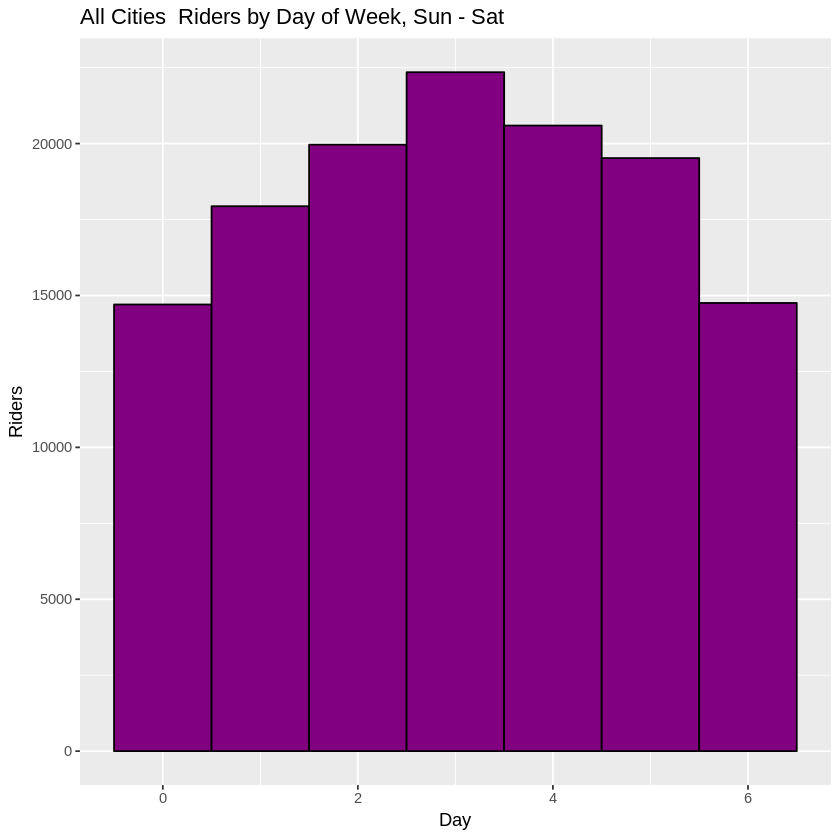

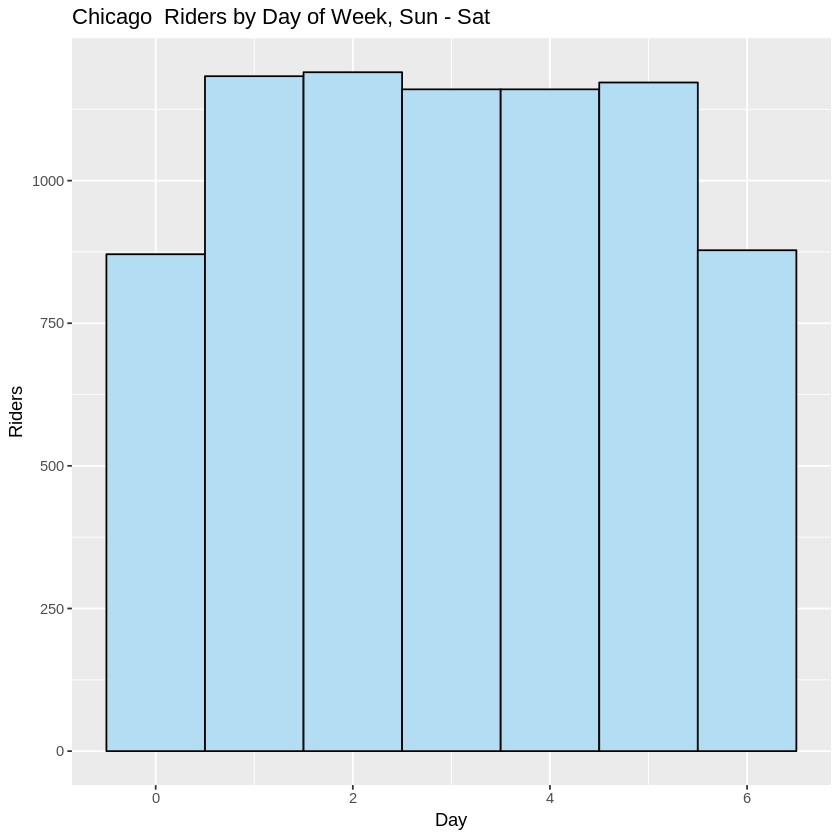

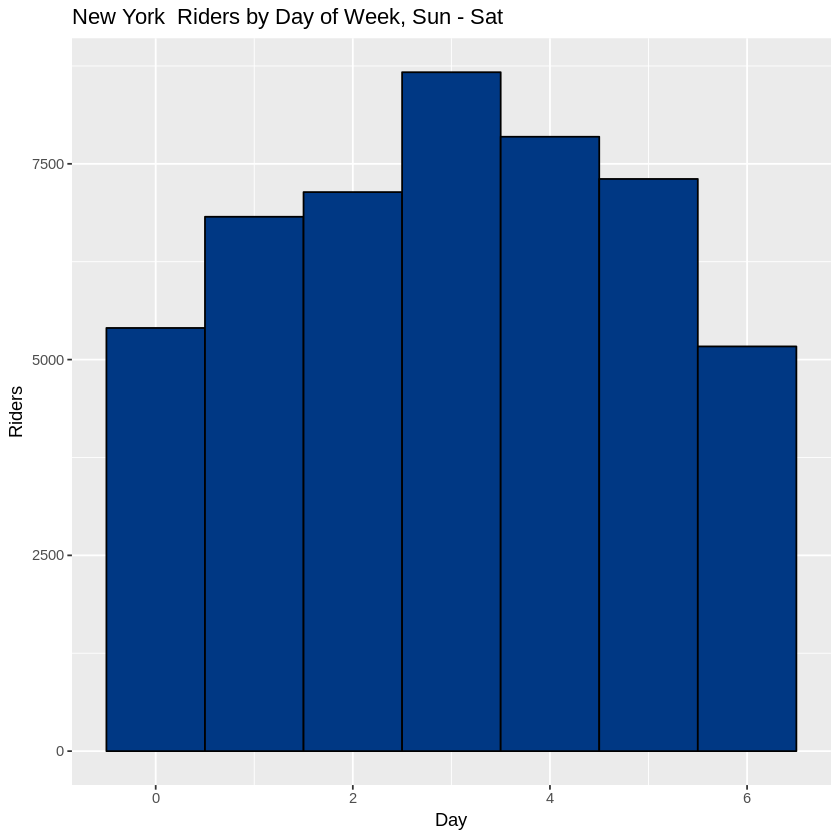

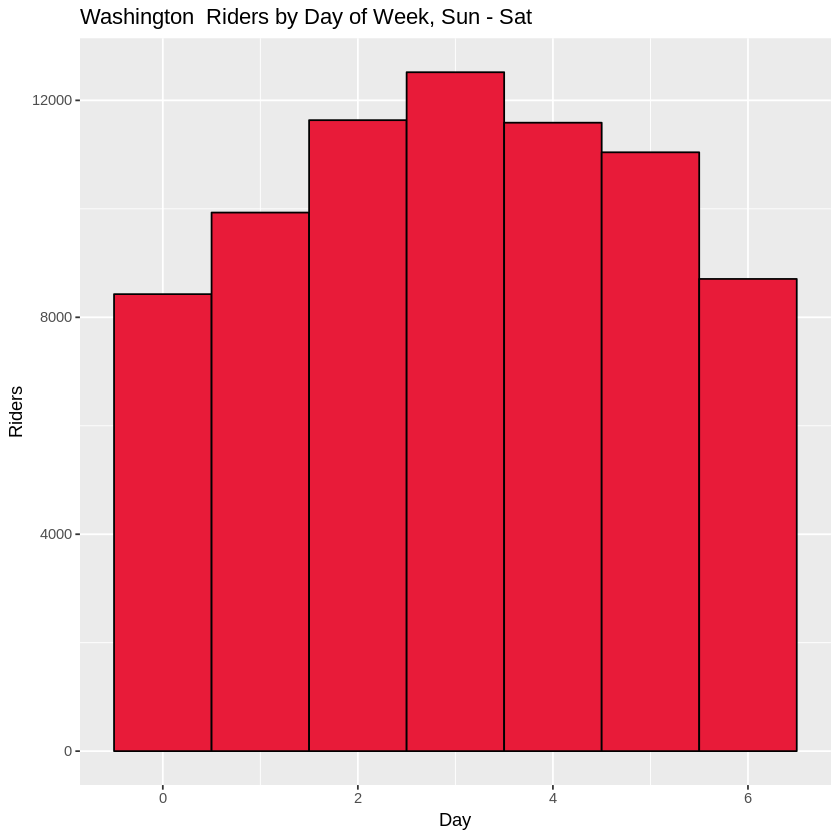

In [38]:
# Histograms of use by Day of Week
baseTitle = " Riders by Day of Week, Sun - Sat"
xlab = "Day"
ylab = "Riders"

# All Cities
city = "All Cities"
title = paste(city, baseTitle)
acd<-PlotByDOW(ac, acPurple, title, xlab, ylab)

# Chicago
city = "Chicago"
title = paste(city, baseTitle)
chd<-PlotByDOW(ch, chBlue, title, xlab, ylab)

# New York
city = "New York"
title = paste(city, baseTitle)
nyd<-PlotByDOW(ny, nyBlue, title, xlab, ylab)

# Washington
city = "Washington"
title = paste(city, baseTitle)
wad<-PlotByDOW(wa, waRed, title, xlab, ylab)

acd
chd
nyd
wad

In [39]:
# what day had the most riders in all cities?
count(ac_orig, Day_of_Week, sort = TRUE)

Day_of_Week,n
Wednesday,25080
Thursday,23187
Tuesday,22478
Friday,22379
Monday,20593
Saturday,19459
Sunday,19272


In [40]:
# what day had the most riders in Chicago?
count(ch_orig, Day_of_Week, sort = TRUE)

Day_of_Week,n
Monday,1302
Tuesday,1292
Friday,1285
Thursday,1254
Wednesday,1236
Saturday,1150
Sunday,1110


In [41]:
# what day had the most riders in New York?
count(ny_orig, Day_of_Week, sort = TRUE)

Day_of_Week,n
Wednesday,9632
Thursday,8729
Friday,8168
Tuesday,7898
Monday,7570
Sunday,6596
Saturday,6176


In [42]:
# what day had the most riders in Washington?
count(wa_orig, Day_of_Week, sort = TRUE)

Day_of_Week,n
Wednesday,14212
Tuesday,13288
Thursday,13204
Friday,12926
Saturday,12133
Monday,11721
Sunday,11566


#### What is the most common day of week?

From the above histograms and tables we can see that the most common day over all for trips is Wednesday. This holds true at the city level for New York and Washington, but Chicago has it's highest ridership on Monday, with Tuesday and Friday not far behind, and Wednesday only just ahead of weekend ridership.

Generally, bikes are more likely to be riden on weekdays. As with the Rides by Month, this holds true across the board. Washington has the highest level of bike use for weekends, but it's weekday use is still greater.

In [43]:
# A Function for creating rides by hour of day histograms
#   parameters:
#       df - the data frame to use for the plot
#       xaxis - the name of the column to use for the x-axis
#       fill - the fill color for the bars, in rgb hex values:
#           eg. #ffffff for white
#       title - a string to use as the title of the plot
#       xlab - the label string for the x-axis
#       ylab - the label string for the y-axis
#   return: plot object
#
#
PlotByHour <- function(df, fill, title, xlab, ylab) {
    hp<-ggplot(df, aes(x = Hour)) + 
            geom_histogram(color = "black", fill = fill, bins = 24) +
            labs(title = title, x = xlab, y = ylab) #+

    return (hp)
}

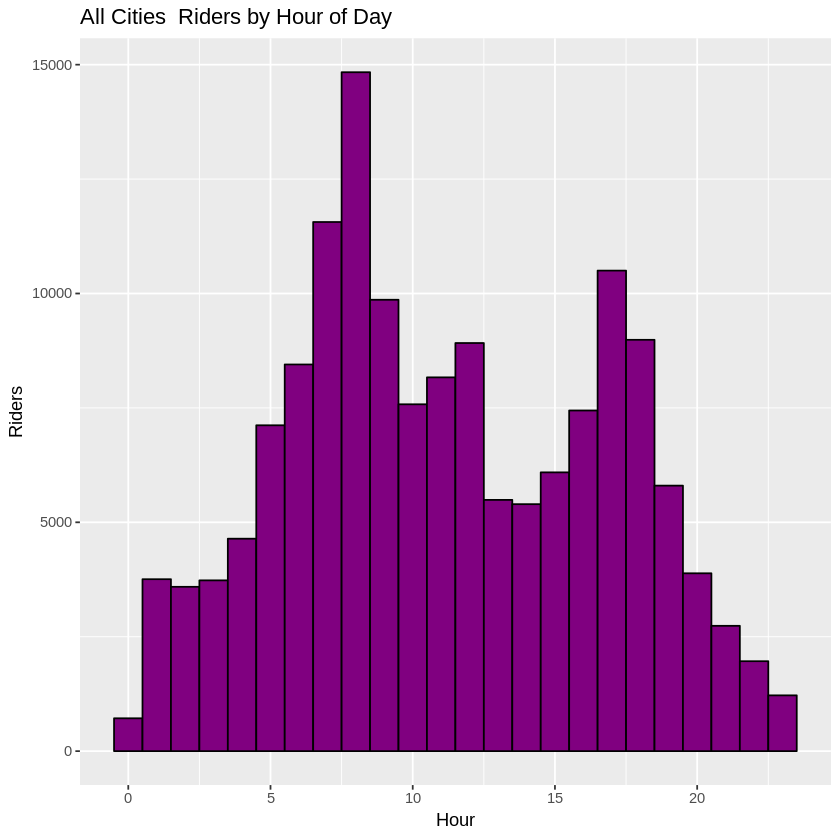

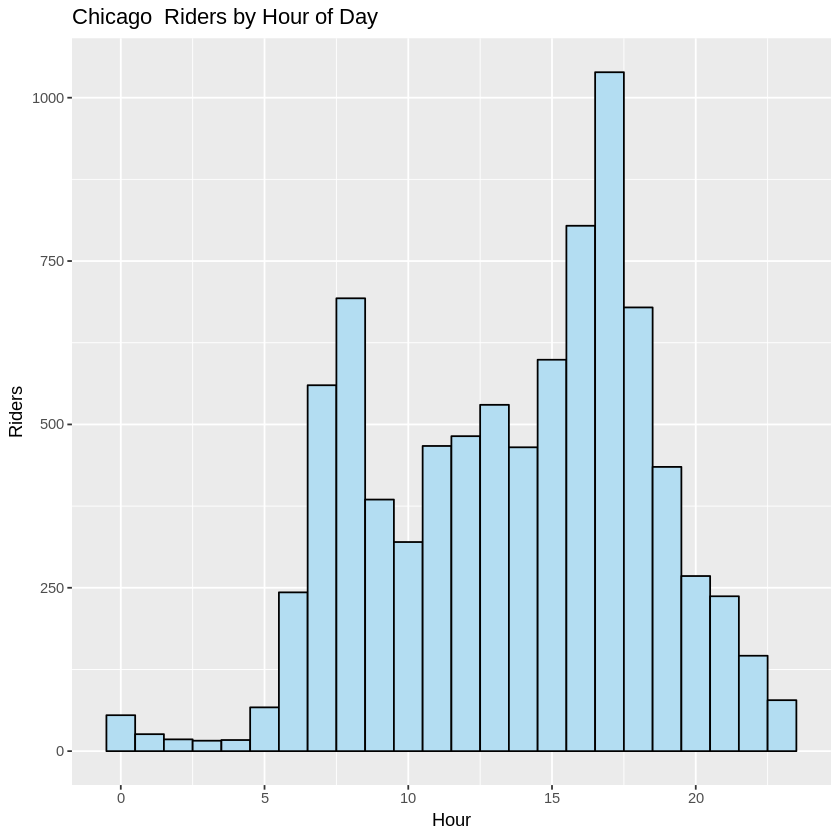

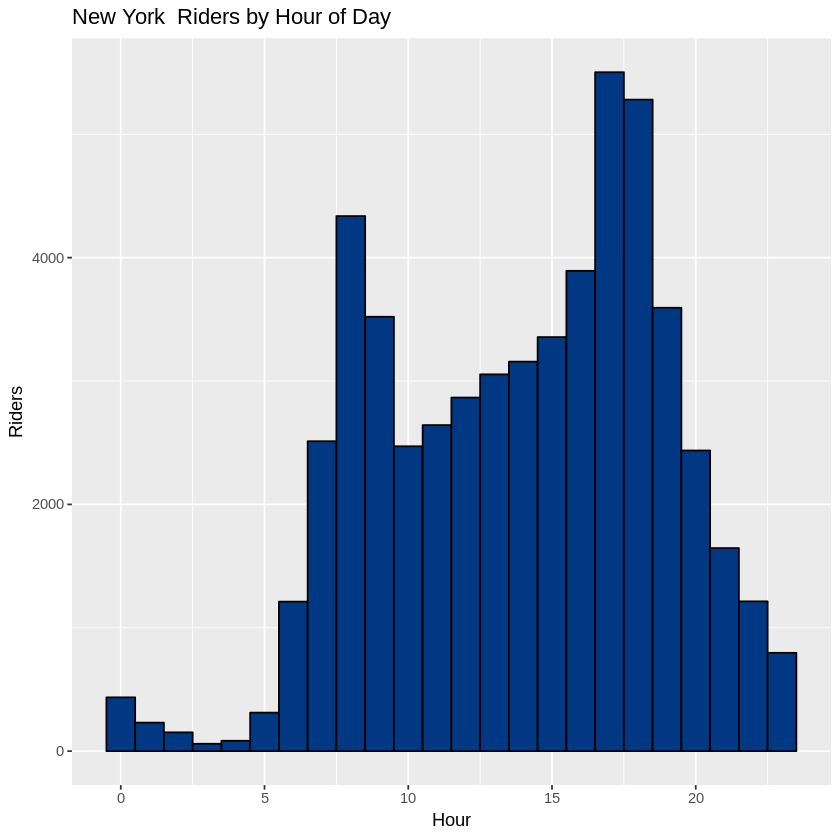

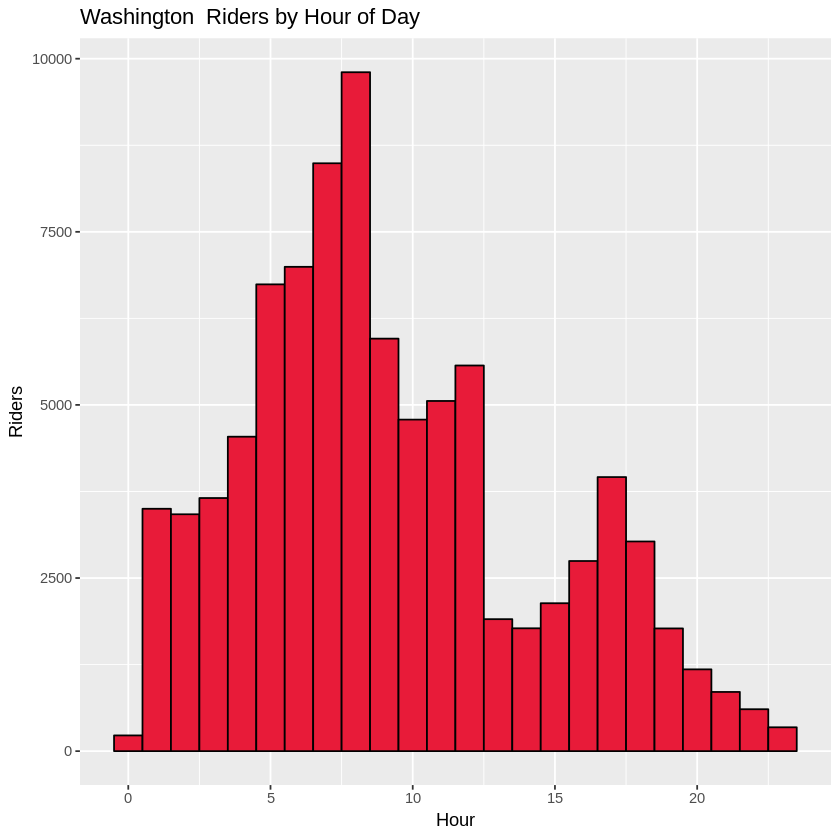

In [44]:
# Histograms of use by Day of Week
baseTitle = " Riders by Hour of Day"
xlab = "Hour"
ylab = "Riders"

# All Cities
city = "All Cities"
title = paste(city, baseTitle)
ach<-PlotByHour(ac_orig, acPurple, title, xlab, ylab)

# Chicago
city = "Chicago"
title = paste(city, baseTitle)
chh<-PlotByHour(ch_orig, chBlue, title, xlab, ylab)

# New York
city = "New York"
title = paste(city, baseTitle)
nyh<-PlotByHour(ny_orig, nyBlue, title, xlab, ylab)

# Washington
city = "Washington"
title = paste(city, baseTitle)
wah<-PlotByHour(wa_orig, waRed, title, xlab, ylab)

ach
chh
nyh
wah

In [45]:
# what hour had the most riders in all cities?
count(ac_orig, Hour, sort = TRUE)

Hour,n
8,14835
7,11562
17,10500
9,9863
18,8988
12,8917
6,8449
11,8167
10,7579
16,7443


In [46]:
# what hour had the most riders in Chicago?
count(ch_orig, Hour, sort = TRUE)

Hour,n
17,1039
16,804
8,693
18,679
15,599
7,560
13,530
12,482
11,467
14,465


In [47]:
# what hour had the most riders in all New York?
count(ny_orig, Hour, sort = TRUE)

Hour,n
17,5503
18,5281
8,4337
16,3893
19,3594
9,3521
15,3356
14,3157
13,3054
12,2866


In [48]:
# what hour had the most riders in Washington?
count(wa_orig, Hour, sort = TRUE)

Hour,n
8,9805
7,8490
6,6994
5,6741
9,5957
12,5569
11,5057
10,4788
4,4541
17,3958


#### What is the most common hour of day?

For the previous two questions the histograms and data tables were both easy to read and understand. That doesn't hold true for this question. The histograms are very helpful in understanding overall daily ridership patterns, but the data tables are much more difficult to look at and understand the full picture.

However, the count tables are easier to read when looking for a single most used hour of the day. Even if this single datapoint isn't very helpful in understanding use patterns:

|City|Hour|
|------------|--------|
|All Cities|8 AM|
|Chicago|5 PM|
|New York|5 PM|
|Washington|8 AM|

The overall use pattern is much as one would expect, it follows the typical commuter traffic pattern, including a lunch rush.

There is a Simpson's Paradox regarding the most common hour for trips. It is 8 AM when looking at All Cities, and at Washington, but the most popular hour for Chicago and New York is 5 PM. This shows how the volume of ridership in Washington can overwhelm ridership details from the other two cities, this is particularly strong when New York and Washington are in agreement and Chicago is on it's own.

Another interesting observation is the strong preference for riding in the morning, in Washington. This preference is even easier to see than the commuter traffic pattern.

In [49]:
# A Function for creating facet plots
#   parameters:
#       df - the data frame to use for the plot
#       xaxis - the name of the column to use for the x-axis
#       fill - the fill color for the bars, in rgb hex values:
#           eg. #ffffff for white
#       title - a string to use as the title of the plot
#       xlab - the label string for the x-axis
#       ylab - the label string for the y-axis
#   return: plot object
#
#
PlotFacets <- function(df, fill, title, xlab, ylab) {
    hp <- ggplot(ac, aes(x = Hour))+
        geom_histogram(color = "black", fill = fill, bins = 24)+
        facet_grid(Day_of_Week_Number ~ .)+
        labs(title = title, x = xlab, y = ylab)

    return (hp)
}

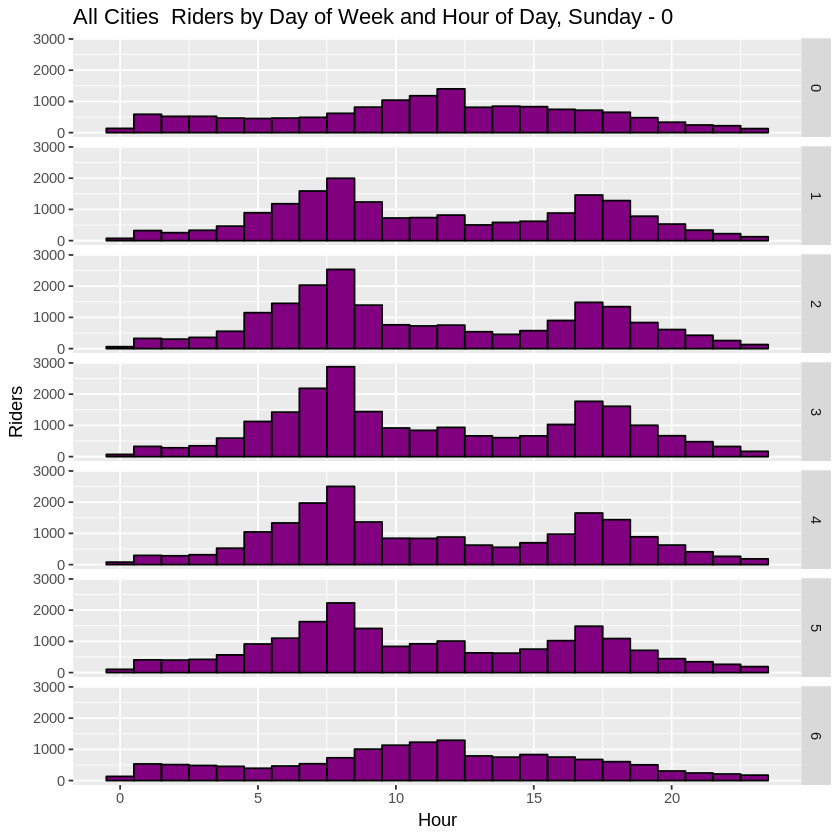

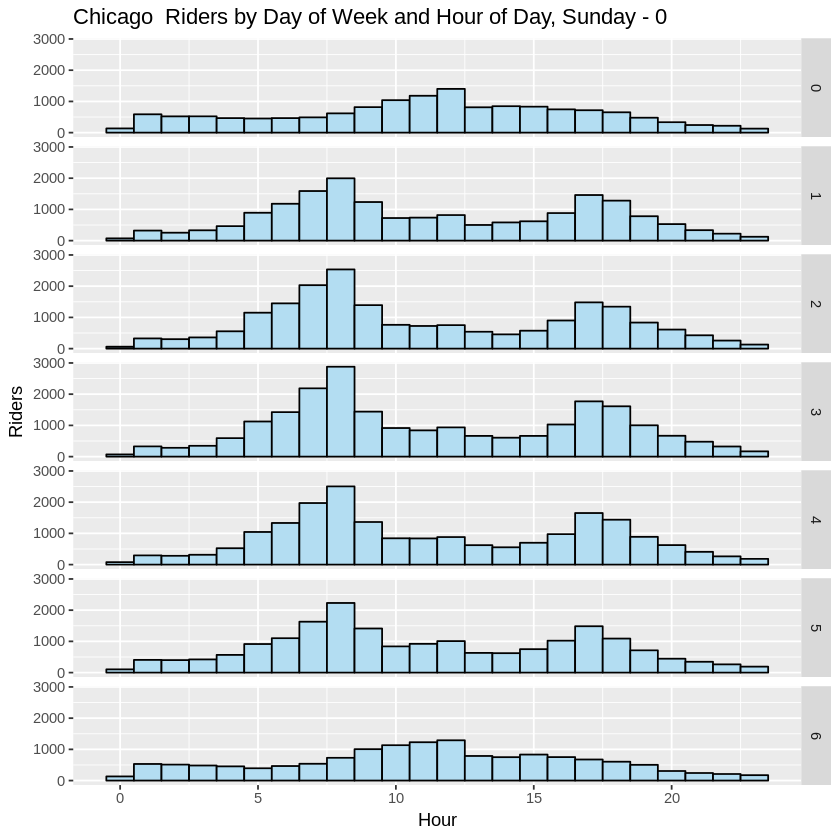

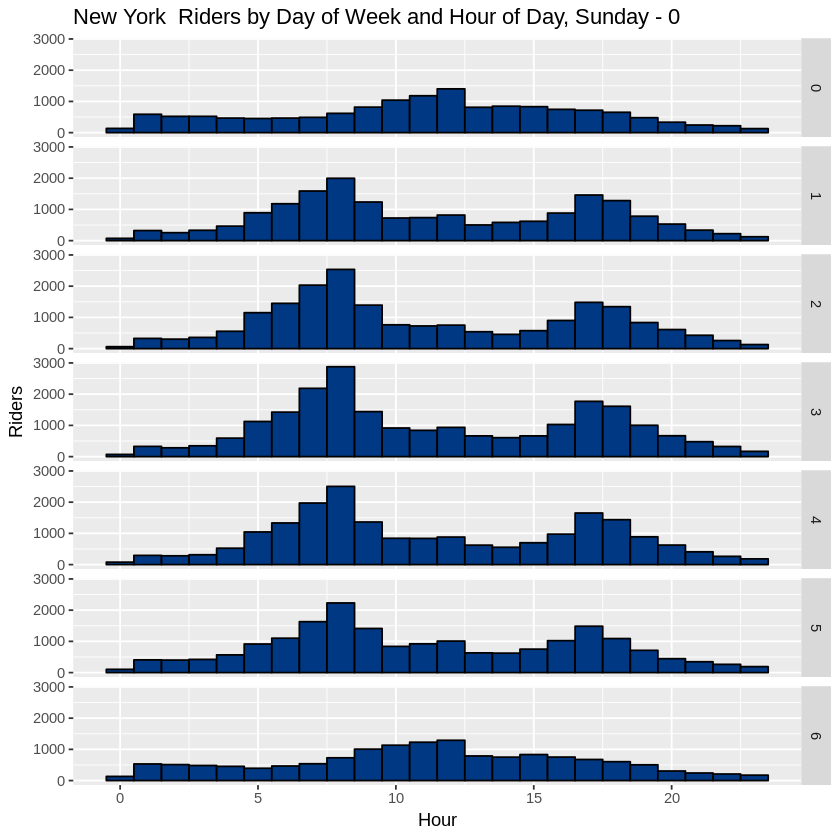

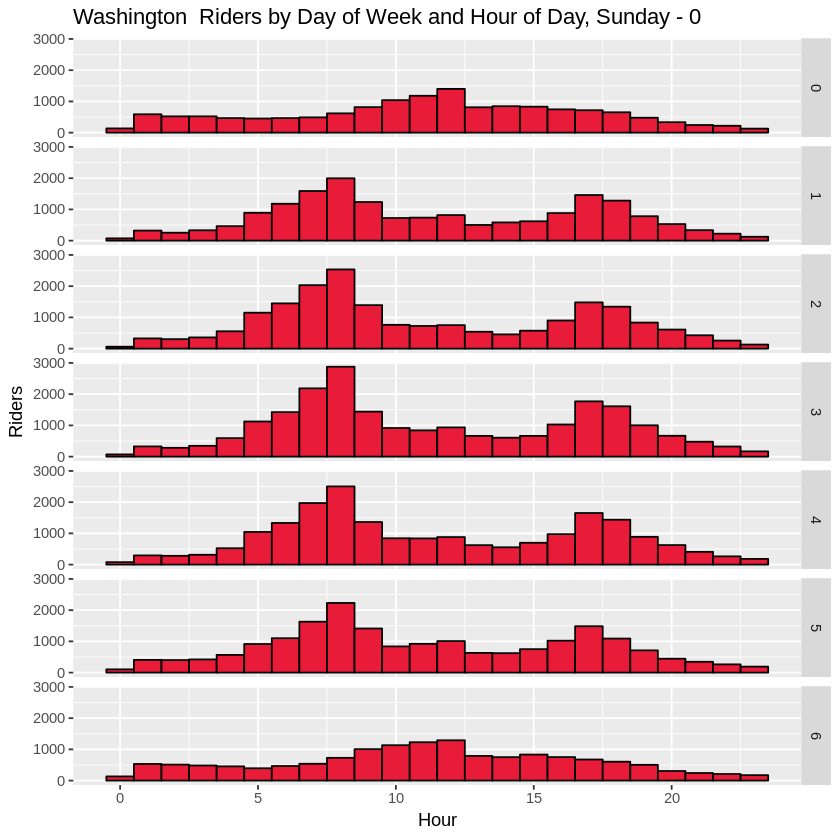

In [50]:
# Facetted plots on hour and day of week
baseTitle = " Riders by Day of Week and Hour of Day, Sunday - 0"
xlab = "Hour"
ylab = "Riders"

# All Cities
city = "All Cities"
title = paste(city, baseTitle)
acf<-PlotFacets(ac_orig, acPurple, title, xlab, ylab)

# Chicago
city = "Chicago"
title = paste(city, baseTitle)
chf<-PlotFacets(ch_orig, chBlue, title, xlab, ylab)

# New York
city = "New York"
title = paste(city, baseTitle)
nyf<-PlotFacets(ny_orig, nyBlue, title, xlab, ylab)

# Washington
city = "Washington"
title = paste(city, baseTitle)
waf<-PlotFacets(wa_orig, waRed, title, xlab, ylab)

acf
chf
nyf
waf

#### Hour of Day and Day of Week Travel Patterns

There a number of things to see in the above charts, there are two similarities across all three cities, and some interesting differences too.

Similarities:
 * All three cities show higher bike use on weekdays and lower use on weekends.
 * Commuting hours can be seen on week days. 8 AM and 5 PM can easily be picked out.
 
Differences:
 * Chicago and New York have usage patterns that look natural to me. Strong commuter use on weekdays and lighter use on weekends, with a preference for afternoons.
 * Washington is rather different. While the commuter use pattern can be seen, it is secondary to a very strong morning use pattern. Starting at 1 AM Washington bike use really takes off and goes strong until noon, when it dramatically falls off, this holds true seven days a week.

#### Question 1 Conclusion

From the data, June is the most popular month for bike use, but as we only have six months of data, January to June, this conclusion cannot be made with high confidence.

Wednesday has the highest average ridership, and this holds true for New York and Washington, but for Chicago it is the least popular weekday. This lower popularity is not by a huge margin, all weekdays have high ridership in Chicago.

Looking at the All Cities data would lead one to believe that 8 AM is the most popular hour of the day, and it is in Washington. While New York and Chicago both have their highest morning ridership at 8 AM they have even higher ridership at 5 PM.

## Question 2

### Popular stations and trip

* What is the most common start station?
* What is the most common end station?
* What is the most common trip from start to end (i.e., most frequent combination of start station and end station)?

In [51]:
# What was the most common start station out of all the cities?
count(ac_orig, Start_Station, sort = TRUE)

Start_Station,n
Columbus Circle / Union Station,1700
Lincoln Memorial,1546
Jefferson Dr & 14th St SW,1488
Massachusetts Ave & Dupont Circle NW,1219
Jefferson Memorial,1068
15th & P St NW,1040
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1010
Henry Bacon Dr & Lincoln Memorial Circle NW,910
4th St & Madison Dr NW,894
Eastern Market Metro / Pennsylvania Ave & 7th St SE,823


In [52]:
# What was the most common end station out of all the cities?
ac_orig %>% count(End_Station, sort = TRUE)

End_Station,n
Columbus Circle / Union Station,1767
Jefferson Dr & 14th St SW,1603
Lincoln Memorial,1514
Massachusetts Ave & Dupont Circle NW,1344
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1103
15th & P St NW,1077
Jefferson Memorial,1026
Henry Bacon Dr & Lincoln Memorial Circle NW,929
4th St & Madison Dr NW,883
14th & V St NW,814


In [53]:
# What was the most common trip out of all the cities?
ac_orig %>% count(Start_Station, End_Station, sort = TRUE)

Start_Station,End_Station,n
Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,198
Smithsonian-National Mall / Jefferson Dr & 12th St SW,Smithsonian-National Mall / Jefferson Dr & 12th St SW,192
Lincoln Memorial,Jefferson Dr & 14th St SW,143
Lincoln Memorial,Jefferson Memorial,143
Jefferson Dr & 14th St SW,Lincoln Memorial,138
Lincoln Memorial,Lincoln Memorial,120
Jefferson Memorial,Lincoln Memorial,115
8th & F St NE,Columbus Circle / Union Station,109
Columbus Circle / Union Station,8th & F St NE,107
4th St & Madison Dr NW,4th St & Madison Dr NW,102


#### Question 2 Conclusion

Unsurprisingly, when looking at the data for all three cities combined, all three questions are answered with stations in Washington. It would be interesting to look at the data for each city individually, but that is beyond the scope of this project.

From the above count tables it can be seen that the **Columbus Circle / Union Station** station is the most popular start and stop point, however it is neither the start or stop station for the most popular trip.

The most popular trip starts and stops at the same station, which may seem odd, until the station's location is considered. This station is **Jefferson Dr & 14th St SW**. It is just East Southeast of the Washington Monument. The next six most popular trips are also right near the National Mall. I would suggest that this indicates the bike rentals have a high popularity among tourists.

## Question 3

### Trip Duration By Month/Day/Hour and City

* What is the total travel time for users in different cities?
* What is the average travel time for users in different cities?

In [54]:
# how many minutes were riden in Chicago
chTTD = sum(ch_orig$Trip_Duration_Minutes)
chTTD

[1] 134720

In [55]:
# how many minutes were riden in New York
nyTTD = sum(ny_orig$Trip_Duration_Minutes)
nyTTD

[1] 824864

In [56]:
# how many minutes were riden in Washington
waTTD = sum(wa_orig$Trip_Duration_Minutes)
waTTD

[1] 1831392

In [57]:
# how many more minutes were ridden in Washington than in the other two cities combined?
waTTD - nyTTD - chTTD

[1] 871808

In [58]:
# average trip duration for all cities
summary(ac_orig$Trip_Duration_Minutes)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     7.00    11.00    18.31    19.00 18144.00 

In [59]:
# average trip duration for Chicago
summary(ch_orig$Trip_Duration_Minutes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   11.00   15.61   19.00 1423.00 

In [60]:
# average trip duration for New York
summary(ny_orig$Trip_Duration_Minutes)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     6.00    10.00    15.06    18.00 18144.00 

In [61]:
# average trip duration for Washington
summary(wa_orig$Trip_Duration_Minutes)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.00     7.00    12.00    20.57    21.00 15077.00 

#### Question 3 Conclusion

While the total travel time for users in Washington is far higher than for New York or Chicago, this should not be a surprise, as it also has the most trips.

|City|Total Duration|
|------------|--------|
|Chicago|134720|
|New York|824864|
|Washington|1831392|

The average trip time for all three cities and each city individually is interesting to look at:

|City|Mean Duration in Minutes|
|------------|--------|
|All Cities|18.31|
|Chicago|15.61|
|New York|15.06|
|Washington|20.57|

Washington has the highest average ride duration. This with the rest of the data seem to indicate a strong tourist use in Washington, including the morning preference, before the temperatures get too high. As well as the warmer month preference, when more people vacation.

## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')